# Welcome to the OnSSET Notebook for Ethiopia

This jupyter based interface has been designed to support scenario runs for Ethiopia. 

The interface is built on the [OnSSET](http://www.onsset.org/) tool developed by KTH division of Energy Systems to provide an easy and quick way to generate electrification investment scenarios.

#### Start by importing the code 

In [1]:
from onsset import *
import os
from IPython.display import display, Markdown, HTML
%matplotlib inline

2020-04-09 11:28:19,637		CACHEDIR=C:\Users\asahl\.matplotlib
2020-04-09 11:28:19,653		Using fontManager instance from C:\Users\asahl\.matplotlib\fontlist-v300.json
2020-04-09 11:28:20,137		Loaded backend module://ipykernel.pylab.backend_inline version unknown.
2020-04-09 11:28:20,140		Loaded backend module://ipykernel.pylab.backend_inline version unknown.
2020-04-09 11:28:20,150		Loaded backend module://ipykernel.pylab.backend_inline version unknown.


# 1. GIS data selection

First, run the cell below to browse to the directory your input CSV file is located at and select the input file. The GIS data input file for Ethiopia is available <a href="https://drive.google.com/drive/u/1/folders/1uYwqdY1ylZwCGQ2FeCOpZUHgDlJVbAFJ" target="_blank">here</a>. 


In [2]:
import tkinter as tk
from tkinter import filedialog, messagebox
from openpyxl import load_workbook
root = tk.Tk()
root.withdraw()
root.attributes("-topmost", True)
messagebox.showinfo('OnSSET', 'Open the input file with extracted GIS data')
input_file = filedialog.askopenfilename()

onsseter = SettlementProcessor(input_file)
onsseter.df['IsUrban'] = 0
onsseter.df['Conflict'] = 0
onsseter.df['PerCapitaDemand'] = 0

# 2. Modelling period and target electrification rate

Next, define the modelling period and the electrification rate to be achieved by the end of the analysis. Further down you will also define an intermediate year and target.

In [3]:
start_year = 2018
end_year = 2030
electrification_rate_target = 1 # E.g. 1 for 100% electrification rate or 0.80 for 80% electrification rate 

#### Electricity demand target level
Next, enter the target tier (level of electricity access) for urban and rural households respectively. This can take a value between 1 (lowest level of electricity access) and 5 (highest level of electricity access) as in ESMAPs Multi-Tier Framework for Measuring Electricity Access (found <a href="https://www.esmap.org/node/55526" target="_blank">here</a>). 

In [4]:
urban_target_tier = 4
rural_target_tier = 2

#### Intermediate electrification rate target
The OnSSET model for Uganda is made to run in two steps. Enter the intermediate target year and target electrification rate for that year.

In [7]:
intermediate_year = 2025
intermediate_electrification_target = 0.77 # E.g. for a target electrification rate of 75%, enter 0.75

#### PV system cost adjustment
This reflects the role of PV system costs on electrification results. All PV based systems will be adjusted by a factor to simulate a higher or lower cost of PV systems (compared to the baseline values entered below). A value lower than 1 means lower investment costs for PV systems compared to baseline, and a value larger than 1 means higher investment cost for PV systems compared to baseline. E.g. ***0.75*** would mean a cost that is 25% lower compared to baseline costs.

In [6]:
pv_adjustment_factor = 1

#### Grid specifications
This part can be used to impose restrictions or forced extensions of the grid. 

In [8]:
# Buffer distance (km) from the current grid network for automatic connection to the grid.
auto_intensification = 2

# This is the maximum amount of new households that can be connected to the grid in one year (thousands) per time-step
annual_new_grid_connections_limit = {intermediate_year: 534,
                                     end_year: 999999999}

# This is the maximum generation capacity that can be added to the grid in one year (MW)
annual_grid_cap_gen_limit = {intermediate_year: 398,
                             end_year: 999999999}

# 4. Enter country specific data

In addition to the options above the user can customize a large number of variables describing the social - economic - technological environment in the selected country. 

**Note!** Most input values shall represent estimates for the variable valid throughout the modelling period, i.e. **NOT** current values.

### a. Demographics and Social components

In [9]:
pop_start_year = 107535000       ### Write the population in the base year (e.g. 2018) 
end_year_pop = 139620180         ### Write the population in the end year of the analysis (e.g. 2030)

urban_ratio_start_year = 0.208   ### Write the urban population population ratio in the base year (e.g. 2018)
urban_ratio_end_year = 0.269     ### Write the urban population population ratio in the end year (e.g. 2030)

num_people_per_hh_urban = 4.4     ### Write the number of people per household expected in the end year (e.g. 2030)
num_people_per_hh_rural = 5.2   ### Write the number of people per household expected in the end year (e.g. 2030)

elec_ratio_start_year = 0.44   ### Write the electrification rate in the base year (e.g. 2018)
urban_elec_ratio = 0.97       ### Write urban electrification rate in the base year (e.g. 2018)
rural_elec_ratio = 0.31         ### Write rural electrification rate in the base year (e.g. 2018)

### b. Technology specifications & costs

The cell below contains all the information that is used to calculate the levelized costs for all the technologies, including grid. These default values should be updated to reflect the most accurate values in the country. There are currently 7 potential technologies to include in the model:
* Grid
* PV Mini-grid
* Wind Mini-grid
* Hydro Mini-grid
* Diesel Mini-grid
* PV Stand-alone systems
* Diesel Stand-alone systems

First, decide whether to include diesel technologies or not:

In [10]:
diesel_techs = 0                      ### 0 = diesel NOT included, 1 = diesel included 

In [12]:
grid_generation_cost = 0.09           ### This is the grid electricity generation cost (USD/kWh) as expected in the end year of the analysis
grid_power_plants_capital_cost = 2248 ### The cost in USD/kW to for capacity upgrades of the grid
grid_losses = 0.099                     ### The fraction of electricity lost in transmission and distribution (percentage) 
base_to_peak = 0.8                    ### The ratio of base grid demand to peak demand (percentage) 
existing_grid_cost_ratio = 0.1        ### The additional cost per round of electrification (percentage) 

In [13]:
diesel_price = 0.5                   ### This is the diesel price in USD/liter as expected in the end year of the analysis.

In [14]:
sa_diesel_capital_cost = 938          ### Stand-alone Diesel capital cost (USD/kW) as expected in the years of the analysis
mg_diesel_capital_cost = 721          ### Mini-grid Diesel capital cost (USD/kW) as expected in the years of the analysis
mg_pv_capital_cost = 2950             ### Mini-grid PV capital cost (USD/kW) as expected in the years of the analysis
mg_wind_capital_cost = 3750           ### Mini-grid Wind capital cost (USD/kW) as expected in the years of the analysis
mg_hydro_capital_cost = 3000          ### Mini-grid Hydro capital cost (USD/kW) as expected in the years of the analysis

In [15]:
sa_pv_capital_cost_1 = 9620          ### Stand-alone PV capital cost (USD/kW) for household systems under 20 W
sa_pv_capital_cost_2 = 8780          ### Stand-alone PV capital cost (USD/kW) for household systems between 21-50 W
sa_pv_capital_cost_3 = 6380           ### Stand-alone PV capital cost (USD/kW) for household systems between 51-100 W
sa_pv_capital_cost_4 = 4470           ### Stand-alone PV capital cost (USD/kW) for household systems between 101-1000 W
sa_pv_capital_cost_5 = 6950           ### Stand-alone PV capital cost (USD/kW) for household systems over 1 kW

The cells below contain additional technology specifications

In [16]:
coordinate_units = 1000  # 1000 if coordinates are in m, 1 if coordinates are in km
discount_rate = 0.08 # E.g. 0.08 means a discount rate of 8%

# Transmission and distribution costs
hv_line_capacity=69 # kV
hv_line_cost=53000 # USD/km
mv_line_cost = 7000 # USD/kW
mv_line_capacity=50 # kV
mv_line_max_length=50 # km
mv_increase_rate=0.1
max_mv_line_dist = 50 # km
MV_line_amperage_limit = 8  # Ampere (A)
lv_line_capacity=0.24 #kV
lv_line_max_length=0.8 # km
lv_line_cost=4250 # USD/km
service_Transf_type=50  # kVa
service_Transf_cost=4250  # $/unit
max_nodes_per_serv_trans=300  # maximum number of nodes served by each service transformer
hv_lv_transformer_cost=25000 # USD/unit
hv_mv_transformer_cost=25000 # USD/unit
mv_lv_transformer_cost=10000 # USD/unit
mv_mv_transformer_cost=10000 # USD/unit


# Centralized grid costs
grid_calc = Technology(om_of_td_lines=0.1,
                        distribution_losses=grid_losses,
                        connection_cost_per_hh=150,
                        base_to_peak_load_ratio=base_to_peak,
                        capacity_factor=1,
                        tech_life=30,
                        grid_capacity_investment=grid_power_plants_capital_cost,
                        grid_price=grid_generation_cost)

# Mini-grid hydro costs
mg_hydro_calc = Technology(om_of_td_lines=0.03,
                            distribution_losses=0.05,
                            connection_cost_per_hh=100,
                            base_to_peak_load_ratio=0.85,
                            capacity_factor=0.5,
                            tech_life=30,
                            capital_cost={float("inf"): mg_hydro_capital_cost},
                            om_costs=0.02,
                            )

# Mini-grid wind costs
mg_wind_calc = Technology(om_of_td_lines=0.03,
                            distribution_losses=0.05,
                            connection_cost_per_hh=100,
                            base_to_peak_load_ratio=0.85,
                            capital_cost={float("inf"): mg_wind_capital_cost},
                            om_costs=0.02,
                            tech_life=20,
                            )

# Mini-grid PV costs
mg_pv_calc = Technology(om_of_td_lines=0.03,
                        distribution_losses=0.05,
                        connection_cost_per_hh=100,
                        base_to_peak_load_ratio=0.85,
                        tech_life=20,
                        om_costs=0.02,
                        capital_cost={float("inf"): mg_pv_capital_cost * pv_adjustment_factor}                        
                        )

# Stand-alone PV costs
sa_pv_calc = Technology(base_to_peak_load_ratio=0.9,
                        tech_life=15,
                        om_costs=0.02,
                        capital_cost={float("inf"): sa_pv_capital_cost_5 * pv_adjustment_factor,
                                      1: sa_pv_capital_cost_4 * pv_adjustment_factor,
                                      0.100: sa_pv_capital_cost_3 * pv_adjustment_factor,
                                      0.050: sa_pv_capital_cost_2 * pv_adjustment_factor,
                                      0.020: sa_pv_capital_cost_1 * pv_adjustment_factor},
                        standalone=True
                        )

# Mini-grid diesel costs
mg_diesel_calc = Technology(om_of_td_lines=0.02,
                            distribution_losses=0.05,
                            connection_cost_per_hh=100,
                            base_to_peak_load_ratio=0.85,
                            capacity_factor=0.7,
                            tech_life=15,
                            om_costs=0.1,
                            capital_cost={float("inf"): mg_diesel_capital_cost},
                            mini_grid=True)



# Stand-alone diesel costs
sa_diesel_calc = Technology(base_to_peak_load_ratio=0.9,
                            capacity_factor=0.5,
                            tech_life=10,
                            om_costs=0.1,
                            capital_cost={float("inf"): sa_diesel_capital_cost},
                            standalone=True)

Technology.set_default_values(base_year=start_year, start_year=start_year, end_year=end_year, discount_rate=discount_rate,
                             hv_line_type=hv_line_capacity, hv_line_cost=hv_line_cost, mv_line_type=mv_line_capacity,
                             mv_line_amperage_limit=MV_line_amperage_limit, mv_line_cost=mv_line_cost, lv_line_type=lv_line_capacity,
                             lv_line_cost=lv_line_cost, lv_line_max_length=lv_line_max_length, 
                             service_transf_type=service_Transf_type, service_transf_cost = service_Transf_cost,
                             max_nodes_per_serv_trans=max_nodes_per_serv_trans, mv_lv_sub_station_cost=mv_lv_transformer_cost,
                             mv_mv_sub_station_cost=mv_mv_transformer_cost, hv_lv_sub_station_cost=hv_lv_transformer_cost,
                             hv_mv_sub_station_cost=hv_mv_transformer_cost)

# 5. GIS data import and processing

OnSSET is a GIS based tool and its proper function depends heavily on the diligent preparation and calibration of the necessary geospatial data. Documentation on GIS processing in regards to OnSSET can be found <a href="http://onsset-manual.readthedocs.io/en/latest/data_acquisition.html" target="_blank">here</a>. The following cell reads the CSV-file containing the extracted GIS data for the country chosen in the previous section, and displays a snap-shot of some of the data.

In [18]:
yearsofanalysis = [intermediate_year, end_year]
onsseter.df[SET_COMMERCIAL_DEMAND] = 0
onsseter.condition_df()
onsseter.df[SET_GRID_PENALTY] = onsseter.grid_penalties(onsseter.df)
onsseter.df[SET_WINDCF] = onsseter.calc_wind_cfs()
pop_modelled, urban_modelled = onsseter.calibrate_current_pop_and_urban(pop_start_year, urban_ratio_start_year)
onsseter.project_pop_and_urban(pop_start_year, end_year_pop, end_year_pop, urban_ratio_start_year, 
                                 urban_ratio_end_year, start_year, end_year, intermediate_year)

eleclimits = {intermediate_year: intermediate_electrification_target, end_year: electrification_rate_target}
time_steps = {intermediate_year: intermediate_year-start_year, end_year: end_year-intermediate_year}

display(Markdown('#### The csv file has been imported correctly. Here is a preview:'))
display(onsseter.df[['Country','Pop','NightLights','TravelHours','GHI','WindVel','Hydropower','HydropowerDist']].sample(7))


2020-04-09 11:33:23,871		Ensure that columns that are supposed to be numeric are numeric
2020-04-09 11:33:24,196		Replace null values with zero
2020-04-09 11:33:24,345		Sort by country, Y and X
2020-04-09 11:33:25,280		Classify road dist
2020-04-09 11:33:25,350		Classify substation dist
2020-04-09 11:33:25,418		Classify elevation
2020-04-09 11:33:25,488		Classify slope
2020-04-09 11:33:25,565		Classify land cover
2020-04-09 11:33:26,157		Combined classification
2020-04-09 11:33:26,228		Grid penalty
2020-04-09 11:33:26,283		Calculate Wind CF
2020-04-09 11:34:01,999		Population calibration process
2020-04-09 11:34:24,284		Urban/rural calibration process


The calibrated population differs by 0.00. In case this is not acceptable please revise this part of the code


2020-04-09 11:34:26,667		Population projection process


#### The csv file has been imported correctly. Here is a preview:

,Country,Pop,NightLights,TravelHours,GHI,WindVel,Hydropower,HydropowerDist
70666,Ethiopia,17.224712,0.0,1.450166,1899.621181,2.452124,104.597,38.732458
518502,Ethiopia,236.986243,0.0,2.113825,2129.266249,2.356626,124.143,13.564270
435138,Ethiopia,9.223313,0.0,2.283333,2131.000000,2.284535,100.043,3.662052
623923,Ethiopia,19.688129,0.0,1.683333,2180.000000,3.008112,4755.510,29.017132
601417,Ethiopia,24.022444,0.0,4.433333,2015.000000,3.102086,681.295,29.839320
383031,Ethiopia,7.673686,0.0,3.008753,1921.135656,1.942201,1374.350,13.376769
533835,Ethiopia,40.998378,0.0,1.029435,2115.187140,3.378171,141.194,35.115236


In [19]:
for year in yearsofanalysis:
    mg_diesel_cost = {'diesel_price': diesel_price,
                      'efficiency': 0.33,
                      'diesel_truck_consumption': 33.7,
                      'diesel_truck_volume': 15000}

    sa_diesel_cost = {'diesel_price': diesel_price,
                      'efficiency': 0.28,
                      'diesel_truck_consumption': 14,
                      'diesel_truck_volume': 300}

    onsseter.diesel_cost_columns(sa_diesel_cost, mg_diesel_cost, year)

#### Calibration of currently electrified settlements

The model calibrates which settlements are likely to be electrified in the start year, to match the national statistical values defined above. A settlement is considered to be electrified if it meets all of the following conditions:
- Has more night-time lights than the defined threshold (this is set to 0 by default)
- Is closer to the existing grid network than the distance limit
- Has more population than the threshold

First, define the threshold limits. Then run the calibration and check if the results seem okay. Else, redefine these thresholds and run again.

In [20]:
min_night_lights = 0    ### 0 Indicates no night light, while any number above refers to the night-lights intensity
min_pop = 200      ### Settlement population above which we can assume that it could be electrified

max_service_transformer_distance = 2    ### Distance in km from the existing grid network below which we can assume a settlement could be electrified
max_mv_line_distance = 3
max_hv_line_distance = 25

elec_modelled, urban_internal_elec_ratio, rural_internal_elec_ratio = onsseter.elec_current_and_future(elec_ratio_start_year, 
                                                                                                       urban_elec_ratio, 
                                                                                                       rural_elec_ratio, 
                                                                                                       start_year,
                                                                                                       min_night_lights=min_night_lights, 
                                                                                                       min_pop=min_pop, 
                                                                                                       max_transformer_dist=max_service_transformer_distance, 
                                                                                                       max_mv_dist=max_mv_line_distance, 
                                                                                                       max_hv_dist=max_hv_line_distance) 

2020-04-09 11:36:35,627		Calibrate current electrification


We have identified the existence of transformers or MV lines as input data; therefore we proceed using those for the calibration
The modelled electrification rate differ by -0.00. Urban elec. rate differ by -0.05 and Rural elec. rate differ by 0.01. 
If this is not acceptable please revise this part of the algorithm


The figure below show the results of the calibration. Settlements in **blue** are considered to be (at least partly) electrified already in the start year of the analysis, while settlements in **yellow** are yet to be electrified. Re-running the calibration step with different intial values may change the map below.

<Figure size 2160x2160 with 0 Axes>

2020-04-09 11:36:51,646		update_title_pos
2020-04-09 11:36:51,689		findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('C:\\Users\\asahl\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf') with score of 0.050000.
2020-04-09 11:36:51,957		update_title_pos
2020-04-09 11:36:52,174		update_title_pos
2020-04-09 11:36:52,273		update_title_pos
2020-04-09 11:36:52,325		update_title_pos


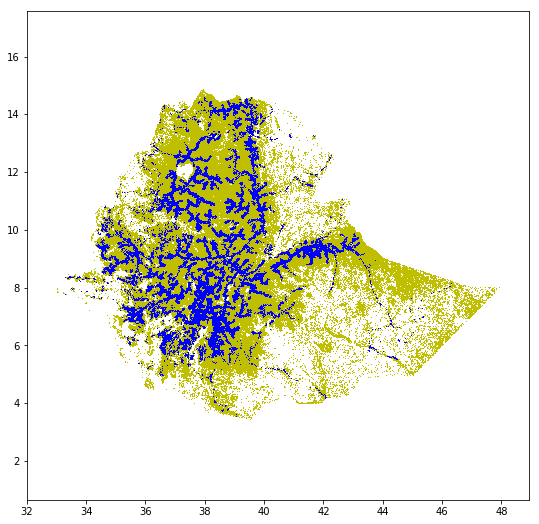

<Figure size 2160x2160 with 0 Axes>

In [21]:
from matplotlib import pyplot as plt
colors = ['#73B2FF','#EDD100','#EDA800','#1F6600','#98E600','#70A800','#1FA800']
plt.figure(figsize=(9,9))
plt.plot(onsseter.df.loc[onsseter.df[SET_ELEC_CURRENT]==0, SET_X_DEG], onsseter.df.loc[onsseter.df[SET_ELEC_CURRENT]==0, SET_Y_DEG], 'y,')
plt.plot(onsseter.df.loc[onsseter.df[SET_ELEC_CURRENT]==1, SET_X_DEG], onsseter.df.loc[onsseter.df[SET_ELEC_CURRENT]==1, SET_Y_DEG], 'b,')
if onsseter.df[SET_X_DEG].max() - onsseter.df[SET_X_DEG].min() > onsseter.df[SET_Y_DEG].max() - onsseter.df[SET_Y_DEG].min():
    plt.xlim(onsseter.df[SET_X_DEG].min() - 1, onsseter.df[SET_X_DEG].max() + 1)
    plt.ylim((onsseter.df[SET_Y_DEG].min()+onsseter.df[SET_Y_DEG].max())/2 - 0.5*abs(onsseter.df[SET_X_DEG].max() - onsseter.df[SET_X_DEG].min()) - 1, (onsseter.df[SET_Y_DEG].min()+onsseter.df[SET_Y_DEG].max())/2 + 0.5*abs(onsseter.df[SET_X_DEG].max() - onsseter.df[SET_X_DEG].min()) + 1)
else:
    plt.xlim((onsseter.df[SET_X_DEG].min()+onsseter.df[SET_X_DEG].max())/2 - 0.5*abs(onsseter.df[SET_Y_DEG].max() - onsseter.df[SET_Y_DEG].min()) - 1, (onsseter.df[SET_X_DEG].min()+onsseter.df[SET_X_DEG].max())/2 + 0.5*abs(onsseter.df[SET_Y_DEG].max() - onsseter.df[SET_Y_DEG].min()) + 1)
    plt.ylim(onsseter.df[SET_Y_DEG].min() -1, onsseter.df[SET_Y_DEG].max() +1)
plt.figure(figsize=(30,30))

# 6. Define the demand

This piece of code defines the target electricity demand in the region/country. Residential electricity demand is defined as kWh/household/year, while all other demands are defined as kWh/capita/year. Note that at the moment, all productive uses demands are set to 0 by default.

In [22]:
# Define the annual household electricity targets to choose from
tier_1 = 38.7  # 38.7 refers to kWh/household/year. 
tier_2 = 219
tier_3 = 803
tier_4 = 2117
tier_5 = 2993

onsseter.prepare_wtf_tier_columns(num_people_per_hh_rural, num_people_per_hh_urban, tier_1, tier_2, tier_3, tier_4, tier_5)

2020-04-09 11:36:58,449		Populate ResidentialDemandTier columns


In [23]:
onsseter.df[SET_EDU_DEMAND] = 0           # Demand for educational facilities (kWh/capita/year)
onsseter.df[SET_HEALTH_DEMAND] = 0        # Demand for health facilities (kWh/capita/year)
onsseter.df[SET_COMMERCIAL_DEMAND] = 0    # Demand for commercial activities (kWh/capita/year)
onsseter.df[SET_AGRI_DEMAND] = 0          # Demand for agricultural activities (kWh/capita/year)
productive_demand = 0 # 1 if productive demand is defined and should be included, else 0

# 7. Start a scenario run, which calculate and compare technology costs for every settlement in the country

Based on the previous calculation this piece of code identifies the LCoE that every off-grid technology can provide, for each single populated settlement of the selected country. The cell then takes all the currently grid-connected points in the country, and looks at the points within a certain distance from them, to see if it is more economical to connect them to the grid, or to use one of the off-grid technologies calculated above. Once more points are connected to the grid, the process is repeated, so that new points close to those points might also be connected. This is repeated until there are no new points to connect to the grid.

In [24]:
onsseter.current_mv_line_dist()

for year in yearsofanalysis:
    end_year_pop = 1
    prioritization = 2
        
    eleclimit = eleclimits[year]
    time_step = time_steps[year]
    grid_cap_gen_limit = time_step * annual_grid_cap_gen_limit[year] * 1000
    grid_connect_limit = time_step * annual_new_grid_connections_limit[year] * 1000
    
    onsseter.set_scenario_variables(year, num_people_per_hh_rural, num_people_per_hh_urban, time_step,
                                            start_year, urban_target_tier, 
                                            rural_target_tier, end_year_pop, productive_demand)

    sa_diesel_investment, sa_pv_investment, mg_diesel_investment, mg_pv_investment, mg_wind_investment, \
                                        mg_hydro_investment = onsseter.calculate_off_grid_lcoes(mg_hydro_calc, mg_wind_calc, mg_pv_calc,
                                                                                                sa_pv_calc, mg_diesel_calc,
                                                                                                sa_diesel_calc, year, end_year, time_step)
    grid_investment, grid_cap_gen_limit, grid_connect_limit = \
                                        onsseter.pre_electrification(grid_generation_cost, year, time_step, end_year, grid_calc, grid_cap_gen_limit,
                                                                     grid_connect_limit)

    onsseter.df[SET_LCOE_GRID + "{}".format(year)], onsseter.df[SET_MIN_GRID_DIST + "{}".format(year)], \
                                    onsseter.df[SET_ELEC_ORDER + "{}".format(year)], onsseter.df[SET_MV_CONNECT_DIST], grid_investment = \
                                        onsseter.elec_extension(grid_calc,
                                                                mv_line_max_length,
                                                                year,
                                                                start_year,
                                                                end_year,
                                                                time_step,
                                                                grid_cap_gen_limit,
                                                                grid_connect_limit,
                                                                auto_intensification=auto_intensification,
                                                                prioritization=prioritization,
                                                                new_investment=grid_investment)

    onsseter.results_columns(year, time_step, prioritization, auto_intensification)

    onsseter.calculate_investments(sa_diesel_investment, sa_pv_investment, mg_diesel_investment,
                                   mg_pv_investment, mg_wind_investment,
                                   mg_hydro_investment, grid_investment, year)

    onsseter.apply_limitations(eleclimit, year, time_step, prioritization, auto_intensification)

    onsseter.calculate_new_capacity(mg_hydro_calc, mg_wind_calc, mg_pv_calc, sa_pv_calc, mg_diesel_calc,
                                                                    sa_diesel_calc, grid_calc, year)    

2020-04-09 11:37:01,121		Determine current MV line length
2020-04-09 11:37:01,734		Calculate new connections
2020-04-09 11:37:02,488		Setting electrification demand as per target per year
2020-04-09 11:37:04,980		Calculate minigrid hydro LCOE
2020-04-09 11:37:07,854		Calculate minigrid PV LCOE
2020-04-09 11:37:11,175		Calculate minigrid wind LCOE
2020-04-09 11:37:14,657		Calculate standalone PV LCOE
2020-04-09 11:37:17,447		Determine minimum technology (off-grid)
2020-04-09 11:37:26,451		Determine minimum tech LCOE
2020-04-09 11:37:28,661		Define the initial electrification status
2020-04-09 11:37:39,380		Initially 184456 electrified
2020-04-09 11:37:45,543		Electrification loop 1 with 184456 electrified
2020-04-09 11:37:53,282		Calculate investment cost
2020-04-09 11:37:53,401		Determine electrification limits
2020-04-09 11:37:56,610		Determine final electrification decision
2020-04-09 11:37:56,982		Calculate new capacity


The electrification rate achieved in 2025 is 77.0 %


2020-04-09 11:37:57,788		Calculate new connections
2020-04-09 11:37:58,780		Setting electrification demand as per target per year
2020-04-09 11:37:59,600		Calculate minigrid hydro LCOE
2020-04-09 11:38:02,681		Calculate minigrid PV LCOE
2020-04-09 11:38:05,781		Calculate minigrid wind LCOE
2020-04-09 11:38:08,858		Calculate standalone PV LCOE
2020-04-09 11:38:11,207		Determine minimum technology (off-grid)
2020-04-09 11:38:17,777		Determine minimum tech LCOE
2020-04-09 11:38:19,727		Define the initial electrification status
2020-04-09 11:38:29,992		Initially 236953 electrified
2020-04-09 11:38:36,149		Electrification loop 1 with 237009 electrified
2020-04-09 11:38:40,499		Electrification loop 2 with 10 electrified
2020-04-09 11:38:44,458		Electrification loop 3 with 2 electrified
2020-04-09 11:38:52,161		Calculate investment cost
2020-04-09 11:38:52,282		Determine electrification limits
2020-04-09 11:38:52,369		Determine final electrification decision
2020-04-09 11:38:53,023		Calculate

The electrification rate achieved in 2030 is 100.0 %


# 8. Results, Summaries and Visualization
With all the calculations and grid-extensions complete, this block gets the final results on which technology was chosen for each point, how much capacity needs to be installed and what it will cost. Then the summaries, plots and maps are generated.

In [25]:
elements = []
for year in yearsofanalysis:
    elements.append("Population{}".format(year))
    elements.append("NewConnections{}".format(year))
    elements.append("Capacity{}".format(year))
    elements.append("Investment{}".format(year))

techs = ["Grid", "SA_Diesel", "SA_PV", "MG_Diesel", "MG_PV", "MG_Wind", "MG_Hydro"]

sumtechs = []
for year in yearsofanalysis:
    sumtechs.extend(["Population{}".format(year) + t for t in techs])
    sumtechs.extend(["NewConnections{}".format(year) + t for t in techs])
    sumtechs.extend(["Capacity{}".format(year) + t for t in techs])
    sumtechs.extend(["Investment{}".format(year) + t for t in techs])

summary = pd.Series(index=sumtechs, name='country')

for year in yearsofanalysis:
    for t in techs:
        summary.loc["Population{}".format(year) + t] = onsseter.df.loc[(onsseter.df[SET_MIN_OVERALL + '{}'.format(year)] == t + '{}'.format(year)), SET_POP + '{}'.format(year)].sum()
        summary.loc["NewConnections{}".format(year) + t] = onsseter.df.loc[(onsseter.df[SET_MIN_OVERALL + '{}'.format(year)] == t + '{}'.format(year)) & (onsseter.df[SET_ELEC_FINAL_CODE + '{}'.format(year)] < 99), SET_NEW_CONNECTIONS + '{}'.format(year)].sum()
        summary.loc["Capacity{}".format(year) + t] = onsseter.df.loc[(onsseter.df[SET_MIN_OVERALL + '{}'.format(year)] == t + '{}'.format(year)) & (onsseter.df[SET_ELEC_FINAL_CODE + '{}'.format(year)] < 99), SET_NEW_CAPACITY + '{}'.format(year)].sum()/1000
        summary.loc["Investment{}".format(year) + t] = onsseter.df.loc[(onsseter.df[SET_MIN_OVERALL + '{}'.format(year)] == t + '{}'.format(year)) & (onsseter.df[SET_ELEC_FINAL_CODE + '{}'.format(year)] < 99), SET_INVESTMENT_COST + '{}'.format(year)].sum()
        
index = techs + ['Total']
columns = []
for year in yearsofanalysis:
    columns.append("Population{}".format(year))
    columns.append("NewConnections{}".format(year))
    columns.append("Capacity{} (MW)".format(year))
    columns.append("Investment{} (million USD)".format(year))
                                                                                                                                           
summary_table = pd.DataFrame(index=index, columns=columns)

summary_table[columns[0]] = summary.iloc[0:7].astype(int).tolist() + [int(summary.iloc[0:7].sum())]
summary_table[columns[1]] = summary.iloc[7:14].astype(int).tolist() + [int(summary.iloc[7:14].sum())]
summary_table[columns[2]] = summary.iloc[14:21].astype(int).tolist() + [int(summary.iloc[14:21].sum())]
summary_table[columns[3]] = [round(x/1e4)/1e2 for x in summary.iloc[21:28].astype(float).tolist()] + [round(summary.iloc[21:28].sum()/1e4)/1e2]
summary_table[columns[4]] = summary.iloc[28:35].astype(int).tolist() + [int(summary.iloc[28:35].sum())]
summary_table[columns[5]] = summary.iloc[35:42].astype(int).tolist() + [int(summary.iloc[35:42].sum())]
summary_table[columns[6]] = summary.iloc[42:49].astype(int).tolist() + [int(summary.iloc[42:49].sum())]
summary_table[columns[7]] = [round(x/1e4)/1e2 for x in summary.iloc[49:56].astype(float).tolist()] + [round(summary.iloc[49:56].sum()/1e4)/1e2]

In [26]:
display(Markdown('### Summary \n These are the summarized results for full electrification of the selected country by the final year'))
summary_table

### Summary 
 These are the summarized results for full electrification of the selected country by the final year

,Population2025,NewConnections2025,Capacity2025 (MW),Investment2025 (million USD),Population2030,NewConnections2030,Capacity2030 (MW),Investment2030 (million USD)
Grid,65328109,11272535,572,2201.58,78860376,20163123,635,4207.84
SA_Diesel,0,0,0,0.00,0,0,0,0.00
SA_PV,57238098,37126079,863,3859.83,59029963,21903883,563,1671.66
MG_Diesel,0,0,0,0.00,0,0,0,0.00
MG_PV,1946307,109316,2,11.27,1235883,1235883,278,510.68
MG_Wind,0,0,0,0.00,0,0,0,0.00
MG_Hydro,336270,309101,3,25.83,366400,57299,0,3.24
Total,124848786,48817033,1442,6098.51,139492625,43360191,1478,6393.42


2020-04-09 11:39:00,060		update_title_pos
2020-04-09 11:39:00,096		findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=20.0 to DejaVu Sans ('C:\\Users\\asahl\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf') with score of 0.050000.
2020-04-09 11:39:00,103		update_title_pos
2020-04-09 11:39:00,131		update_title_pos
2020-04-09 11:39:00,163		update_title_pos
2020-04-09 11:39:00,203		update_title_pos
2020-04-09 11:39:00,227		update_title_pos
2020-04-09 11:39:00,251		update_title_pos
2020-04-09 11:39:00,275		update_title_pos
2020-04-09 11:39:00,375		update_title_pos
2020-04-09 11:39:00,400		update_title_pos
2020-04-09 11:39:00,421		update_title_pos
2020-04-09 11:39:00,443		update_title_pos
2020-04-09 11:39:00,505		update_title_pos
2020-04-09 11:39:00,526		update_title_pos
2020-04-09 11:39:00,549		update_title_pos
2020-04-09 11:39:00,571		update_title_pos
2020-04-09 11:39:00,599		updat

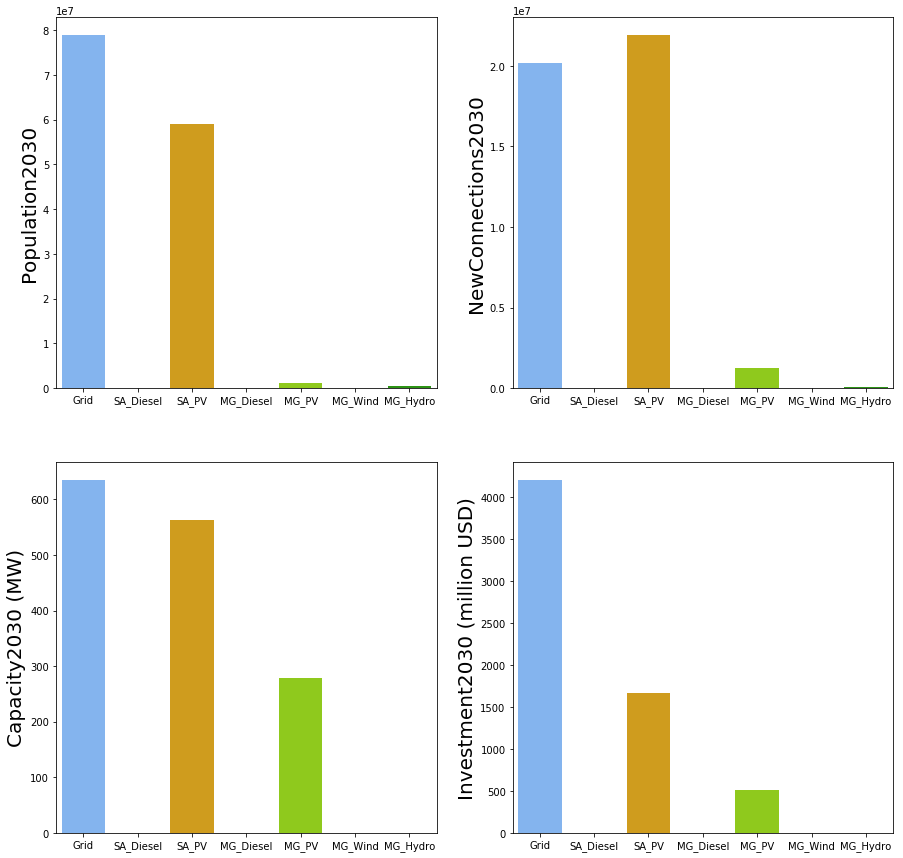

In [27]:
import matplotlib.pylab as plt
import seaborn as sns

colors = ['#73B2FF','#EDD100','#EDA800','#1F6600','#98E600','#70A800','#1FA800']
techs_colors = dict(zip(techs, colors))

summary_plot=summary_table.drop(labels='Total',axis=0)
fig_size = [15, 15]
font_size = 10
plt.rcParams["figure.figsize"] = fig_size
f, axarr = plt.subplots(2, 2)
fig_size = [15, 15]
font_size = 10
plt.rcParams["figure.figsize"] = fig_size

sns.barplot(x=summary_plot.index.tolist(), y=columns[4], data=summary_plot, ax=axarr[0, 0], palette=colors)
axarr[0, 0].set_ylabel(columns[4], fontsize=2*font_size)
axarr[0, 0].tick_params(labelsize=font_size)
sns.barplot(x=summary_plot.index.tolist(), y=columns[5], data=summary_plot, ax=axarr[0, 1], palette=colors)
axarr[0, 1].set_ylabel(columns[5], fontsize=2*font_size)
axarr[0, 1].tick_params(labelsize=font_size)
sns.barplot(x=summary_plot.index.tolist(), y=columns[6], data=summary_plot, ax=axarr[1, 0], palette=colors)
axarr[1, 0].set_ylabel(columns[6], fontsize=2*font_size)
axarr[1, 0].tick_params(labelsize=font_size)
sns.barplot(x=summary_plot.index.tolist(), y=columns[7], data=summary_plot, ax=axarr[1, 1], palette=colors)
axarr[1, 1].set_ylabel(columns[7], fontsize=2*font_size)
axarr[1, 1].tick_params(labelsize=font_size)

<Figure size 2160x2160 with 0 Axes>

2020-04-09 11:39:01,149		update_title_pos
2020-04-09 11:39:01,455		update_title_pos
2020-04-09 11:39:01,692		update_title_pos
2020-04-09 11:39:01,802		update_title_pos
2020-04-09 11:39:01,862		update_title_pos


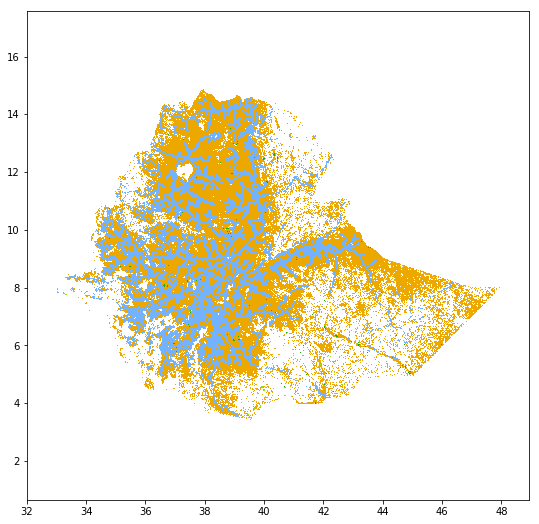

<Figure size 2160x2160 with 0 Axes>

In [ ]:
from matplotlib import pyplot as plt
colors = ['#73B2FF','#EDD100','#EDA800','#1F6600','#98E600','#70A800','#1FA800']
plt.figure(figsize=(9,9))
plt.plot(onsseter.df.loc[onsseter.df['FinalElecCode{}'.format(end_year)]==3, SET_X_DEG], onsseter.df.loc[onsseter.df['FinalElecCode{}'.format(end_year)]==3, SET_Y_DEG], color='#EDA800', marker=',', linestyle='none')
plt.plot(onsseter.df.loc[onsseter.df['FinalElecCode{}'.format(end_year)]==2, SET_X_DEG], onsseter.df.loc[onsseter.df['FinalElecCode{}'.format(end_year)]==2, SET_Y_DEG], color='#EDD100', marker=',', linestyle='none')
plt.plot(onsseter.df.loc[onsseter.df['FinalElecCode{}'.format(end_year)]==4, SET_X_DEG], onsseter.df.loc[onsseter.df['FinalElecCode{}'.format(end_year)]==4, SET_Y_DEG], color='#1F6600', marker=',', linestyle='none')
plt.plot(onsseter.df.loc[onsseter.df['FinalElecCode{}'.format(end_year)]==5, SET_X_DEG], onsseter.df.loc[onsseter.df['FinalElecCode{}'.format(end_year)]==5, SET_Y_DEG], color='#98E600', marker=',', linestyle='none')
plt.plot(onsseter.df.loc[onsseter.df['FinalElecCode{}'.format(end_year)]==6, SET_X_DEG], onsseter.df.loc[onsseter.df['FinalElecCode{}'.format(end_year)]==6, SET_Y_DEG], color='#70A800', marker=',', linestyle='none')
plt.plot(onsseter.df.loc[onsseter.df['FinalElecCode{}'.format(end_year)]==7, SET_X_DEG], onsseter.df.loc[onsseter.df['FinalElecCode{}'.format(end_year)]==7, SET_Y_DEG], color='#1FA800', marker=',', linestyle='none')
plt.plot(onsseter.df.loc[onsseter.df['FinalElecCode{}'.format(end_year)]==1, SET_X_DEG], onsseter.df.loc[onsseter.df['FinalElecCode{}'.format(end_year)]==1, SET_Y_DEG], color='#73B2FF', marker=',', linestyle='none')
if onsseter.df[SET_X_DEG].max() - onsseter.df[SET_X_DEG].min() > onsseter.df[SET_Y_DEG].max() - onsseter.df[SET_Y_DEG].min():
    plt.xlim(onsseter.df[SET_X_DEG].min() - 1, onsseter.df[SET_X_DEG].max() + 1)
    plt.ylim((onsseter.df[SET_Y_DEG].min()+onsseter.df[SET_Y_DEG].max())/2 - 0.5*abs(onsseter.df[SET_X_DEG].max() - onsseter.df[SET_X_DEG].min()) - 1, (onsseter.df[SET_Y_DEG].min()+onsseter.df[SET_Y_DEG].max())/2 + 0.5*abs(onsseter.df[SET_X_DEG].max() - onsseter.df[SET_X_DEG].min()) + 1)
else:
    plt.xlim((onsseter.df[SET_X_DEG].min()+onsseter.df[SET_X_DEG].max())/2 - 0.5*abs(onsseter.df[SET_Y_DEG].max() - onsseter.df[SET_Y_DEG].min()) - 1, (onsseter.df[SET_X_DEG].min()+onsseter.df[SET_X_DEG].max())/2 + 0.5*abs(onsseter.df[SET_Y_DEG].max() - onsseter.df[SET_Y_DEG].min()) + 1)
    plt.ylim(onsseter.df[SET_Y_DEG].min() -1, onsseter.df[SET_Y_DEG].max() +1)
plt.figure(figsize=(30,30))

## 9. Exporting results

This code generates three csv files:
 - one containing all the results for the scenario created
 - one containing the summary for the scenario created
 - one containing some if the key input variables of the scenario

Before we proceed, please write the scenario_name in the first cell below. then move on to the next cell and run it to browse to the directory where you want to save your results. Sample file shall be located at .\ gep-onsset\sample_output. 

**Note that if you do not change the scenario name, the previous output files will be overwritten**

In [ ]:
scenario_name = "scenario_name"

In [ ]:
list1 = [('Start_year',start_year,'','',''), 
         ('End_year',end_year,'','',''),
         ('End year electrification rate target',electrification_rate_target,'','',''),
         ('Intermediate target year', intermediate_year,'','',''),
         ('Intermediate electrification rate target', intermediate_electrification_target,'','',''),
         ('PV cost adjustment factor', pv_adjustment_factor, '', '', ''),
         ('Urban target tier', urban_target_tier, '', '', ''),
         ('Rural target tier', rural_target_tier, '', '', ''),
         ('Prioritization', prioritization,'','','1 = baseline, 2 = intensification'),
         ('Auto intensification distance', auto_intensification, '', '', 'Buffer distance (km) for automatic intensification if choosing prioritization 1'),
         ('coordinate_units',coordinate_units,'','','1000 if coordinates are in m, 1 if coordinates are in km'),
         ('discount_rate',discount_rate,'','',''),
         ('pop_start_year',pop_start_year,'','','the population in the base year (e.g. 2016)'),
         ('pop_end_year',end_year_pop,'','','the projected population in the end year (e.g. 2030)'),
         ('urban_ratio_start_year',urban_ratio_start_year,'','','the urban population population ratio in the base year (e.g. 2016)'),
         ('urban_ratio_end_year',urban_ratio_end_year,'','','the urban population population ratio in the end year (e.g. 2030)'),
         ('num_people_per_hh_urban',num_people_per_hh_urban,'','','the number of people per household expected in the end year (e.g. 2030)'),
         ('num_people_per_hh_rural',num_people_per_hh_rural,'','','the number of people per household expected in the end year (e.g. 2030)'),
         ('elec_ratio_start_year',elec_ratio_start_year,'','','the electrification rate in the base year (e.g. 2016)'),
         ('urban_elec_ratio',urban_elec_ratio,'','','urban electrification rate in the base year (e.g. 2016)'),
         ('rural_elec_ratio',rural_elec_ratio,'','','rural electrification rate in the base year (e.g. 2016)'),
         ('grid_generation_cost',grid_generation_cost,'','','This is the grid cost electricity USD/kWh as expected in the end year of the analysis'),
         ('grid_power_plants_capital_cost',grid_power_plants_capital_cost,'','','The cost in USD/kW to for capacity upgrades of the grid-connected power plants'),
         ('grid_losses',grid_losses,'','','The fraction of electricity lost in transmission and distribution (percentage)'),
         ('base_to_peak',base_to_peak,'','','The ratio of base grid demand to peak demand (percentage)'),
         ('existing_grid_cost_ratio',existing_grid_cost_ratio,'','','The additional cost per round of electrification (percentage)'),
         ('diesel_price',diesel_price,'','','This is the diesel price in USD/liter as expected in the end year of the analysis'),
         ('sa_diesel_capital_cost',sa_diesel_capital_cost,'','','Stand-alone Diesel capital cost (USD/kW) as expected in the years of the analysis'),
         ('mg_diesel_capital_cost',mg_diesel_capital_cost,'','','Mini-grid Diesel capital cost (USD/kW) as expected in the years of the analysis'),
         ('mg_pv_capital_cost',mg_pv_capital_cost,'','','Mini-grid PV capital cost (USD/kW) as expected in the years of the analysis'),
         ('mg_wind_capital_cost',mg_wind_capital_cost,'','','Mini-grid Wind capital cost (USD/kW) as expected in the years of the analysis'),
         ('mg_hydro_capital_cost',mg_hydro_capital_cost,'','','Mini-grid Hydro capital cost (USD/kW) as expected in the years of the analysis'),
         ('sa_pv_capital_cost_1',sa_pv_capital_cost_1,'','','Stand-alone PV capital cost (USD/kW) for household systems under 20 W'),
         ('sa_pv_capital_cost_2',sa_pv_capital_cost_2,'','','Stand-alone PV capital cost (USD/kW) for household systems between 21-50 W'),
         ('sa_pv_capital_cost_3',sa_pv_capital_cost_3,'','','Stand-alone PV capital cost (USD/kW) for household systems between 51-100 W'),
         ('sa_pv_capital_cost_4',sa_pv_capital_cost_4,'','','Stand-alone PV capital cost (USD/kW) for household systems between 101-200 W'),
         ('sa_pv_capital_cost_5',sa_pv_capital_cost_5,'','','Stand-alone PV capital cost (USD/kW) for household systems over 200 W'),
         ('mv_line_cost',mv_line_cost,'','','Cost of MV lines in USD/km'),
         ('lv_line_cost',lv_line_cost,'','','Cost of LV lines in USD/km'),
         ('mv_line_capacity',mv_line_capacity,'','','Capacity of MV lines in kW/line'),
         ('lv_line_capacity',lv_line_capacity,'','','Capacity of LV lines in kW/line'),
         ('lv_line_max_length',lv_line_max_length,'','','Maximum length of LV lines (km)'),
         ('hv_line_cost',hv_line_cost,'','','Cost of HV lines in USD/km'),
         ('mv_line_max_length',mv_line_max_length,'','','Maximum length of MV lines (km)'),
         ('hv_lv_transformer_cost',hv_lv_transformer_cost,'','','Cost of HV/MV transformer (USD/unit)'),
         ('mv_increase_rate',mv_increase_rate,'','','percentage'),
         ('max_grid_extension_dist',max_mv_line_dist,'','','Maximum distance that the grid may be extended by means of MV lines'),
         ('annual_new_grid_connections_limit', annual_new_grid_connections_limit,'','','This is the maximum amount of new households that can be connected to the grid in one year (thousands)'),
         ('grid_capacity_limit',annual_grid_cap_gen_limit,'','','This is the maximum generation capacity that can be added to the grid in one year (MW)'),
         ('GIS data: Administrative boundaries','','','','Delineates the boundaries of the analysis.'),
         ('GIS data: DEM','','','','Filled DEM (elevation) maps are use in a number of processes in the analysis (Energy potentials, restriction zones, grid extension suitability map etc.).'),
         ('GIS data: Hydropower','','','','Points showing potential mini/small hydropower potential.  Provides power availability in each identified point.'),
         ('GIS data: Land Cover','','','','Land cover maps are use in a number of processes in the analysis (Energy potentials, restriction zones, grid extension suitability map etc.).'),
         ('GIS data: Night-time Lights','','','','Dataset used to,identify and spatially calibrate the currently electrified/non-electrified population.'),
         ('GIS data: Population','','','','Spatial identification and quantification of the current (base year) population. This dataset sets the basis of the ONSSET analysis as it is directly connected with the electricity demand and the assignment of energy access goals'),
         ('GIS data: Roads','','','','Current road infrastructure is used in order to specify grid extension suitability.'),
         ('GIS data: Solar GHI','','','','Provide information about the Global Horizontal Irradiation (kWh/m2/year) over an area. This is later used to identify the availability/suitability of Photovoltaic systems.'),
         ('GIS data: Substations','','','','Current Substation infrastructure is used in order to specify grid extension suitability.'),
         ('GIS data: Existing grid','','','','Current grid network'),
         ('GIS data: Planned grid','','','','Planned/committed grid network extensions'),
         ('GIS data: Travel-time','','','','Visualizes spatially the travel time required to reach from any individual cell to the closest town with population more than 50,000 people.'),
         ('GIS data: Wind velocity','','','','Provide information about the wind velocity (m/sec) over an area. This is later used to identify the availability/suitability of wind power (using Capacity factors).'),
        ]
labels = ['Variable','Value', 'Source', 'Comments', 'Description']
df_variables = pd.DataFrame.from_records(list1, columns=labels)

In [ ]:
messagebox.showinfo('OnSSET', 'Browse to the folder where you want to save the outputs')

output_dir = filedialog.askdirectory()
output_dir_variables = os.path.join(output_dir, '{}_Variables.csv'.format(scenario_name))
output_dir_results = os.path.join(output_dir, '{}_Results.csv'.format(scenario_name))
output_dir_summaries = os.path.join(output_dir, '{}_Summaries.csv'.format(scenario_name))

In [ ]:
# Returning the result as a csv file
onsseter.df.to_csv(output_dir_results, index=False)

# Returning the summary as a csv file
summary_table.to_csv(output_dir_summaries, index=True)

# Returning the input variables as a csv file
df_variables.to_csv(output_dir_variables, index=False)